# <font color='black'>Teste Semantix - 5a Questão</font>


### 5. Qual o fator determinante para que o banco exija um seguro de crédito?

In [ ]:
### Feature de análise: default (has credit in default?)
### Resultado yes: não é exigido um seguro de crédito.
### Resultado no: será exigido um seguro de crédito, pois não há crédito automático.

## Observando Correlação entre as features "default" <italic>x</italic> "y"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing as pp
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Carrega o dataset
dforiginal = pd.read_csv("https://github.com/rodolfodomiciano/bank-analysis/raw/master/dforiginal.csv")

In [3]:
# Visualiza as primeiras linhas
dforiginal.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Convertendo char para int de cada coluna

job_data = dforiginal.job.astype('category')
numbers_job = job_data.cat.codes

marital_data = dforiginal.marital.astype('category')
numbers_marital = marital_data.cat.codes

education_data = dforiginal.education.astype('category')
numbers_education = education_data.cat.codes

default_data = dforiginal.default.astype('category')
numbers_default = default_data.cat.codes

housing_data = dforiginal.housing.astype('category')
numbers_housing = housing_data.cat.codes

loan_data = dforiginal.loan.astype('category')
numbers_loan = loan_data.cat.codes

contact_data = dforiginal.contact.astype('category')
numbers_contact = contact_data.cat.codes

month_data = dforiginal.month.astype('category')
numbers_month = month_data.cat.codes

poutcome_data = dforiginal.poutcome.astype('category')
numbers_poutcome = poutcome_data.cat.codes

y_data = dforiginal.y.astype('category')
numbers_y = y_data.cat.codes

In [5]:
num = {'age': (dforiginal.age), 'job' : (numbers_job), 'marital' : (numbers_marital), 'education': (numbers_education), 'default': (numbers_default), 
       'balance': (dforiginal.balance), 'housing': (numbers_housing), 'loan' : (numbers_loan), 'contact' : (numbers_contact),
        'day': (dforiginal.day), 'month': (numbers_month), 'duration': (dforiginal.duration/60), 'campaign': (dforiginal.campaign),
       'pdays': (dforiginal.pdays), 'previous': (dforiginal.previous), 'poutcome': (numbers_poutcome), 'y': (numbers_y)
      }

In [6]:
dfnum = pd.DataFrame(num)
dfnum.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,4.350000,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,2.516667,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1.266667,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1.533333,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,3.300000,1,-1,0,3,0


In [7]:
dfnum.shape

(45211, 17)

In [8]:
dfnum.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,4.302718,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,4.292130,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,1.716667,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,3.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,5.316667,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,81.966667,63.000000,871.000000,275.000000,3.000000,1.000000


In [9]:
# Verificando Correlação
dfnum_corr = dfnum.corr()
dfnum_corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


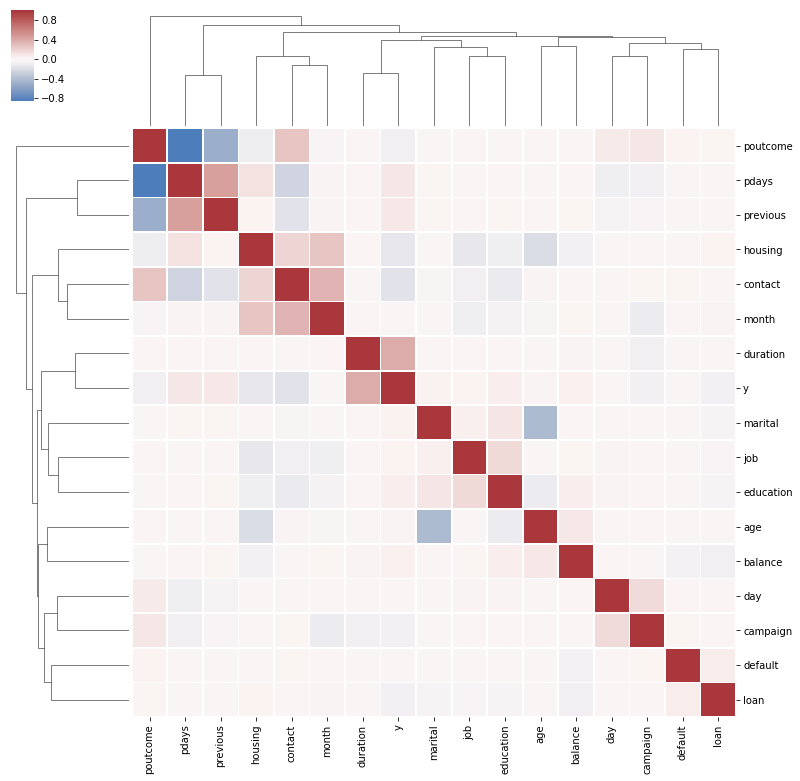

In [10]:
sns.clustermap(dfnum_corr, center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

In [11]:
# Feature Selection
dfnum_corr = dfnum.corr()
dfnum_corr_1 = dfnum_corr.unstack()
dfnum_corr_2 = dfnum_corr_1.sort_values(ascending = False)
dfnum_corr_2.default

default      1.000000
loan         0.077234
poutcome     0.034898
campaign     0.016822
contact      0.015404
month        0.011486
day          0.009424
housing     -0.006025
job         -0.006853
marital     -0.007023
duration    -0.010021
education   -0.010718
age         -0.017879
previous    -0.018329
y           -0.022419
pdays       -0.029979
balance     -0.066745
dtype: float64

## Correlação não necessariamente indica causalidade!! Vamos mais a fundo realizar uma verificação de importância com feature selection . Usarei Árvores de Decisão e Random Forest para análise.

In [13]:
# Separando variáveis target e feature - com as features de maior correlação positiva.

target = dfnum[["default"]]
features = dfnum[["balance", "pdays", "y", "previous", "age", "education", "marital"]]

In [14]:
# Separa os dados em treino e teste (Utilizei a relação 80% (treino) - 20% (teste))
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, 
                                                                      target, 
                                                                      test_size = .2)

##  1. Utilizando Árvores de Decisão

In [15]:
# Criação do modelo
clf = DecisionTreeClassifier()

In [16]:
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [17]:
#Criação do Modelo de Árvore de Decisão
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [18]:
print (confusion_matrix(targetTest, previsoes))

[[8724  149]
 [ 154   16]]


In [19]:
print (accuracy_score(targetTest, previsoes))

0.9664934203251133


In [20]:
# Extraindo a importância
importances = clf.feature_importances_
indices = np.argsort(importances)
importances

array([0.52511185, 0.02332504, 0.01840568, 0.01636221, 0.25053705,
       0.11328243, 0.05297573])

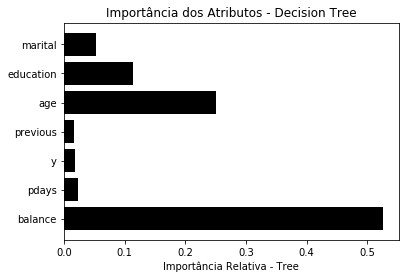

In [21]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title('Importância dos Atributos - Decision Tree')
plt.barh(range(len(indices)), importances, color = 'black', align = 'center')
plt.yticks(range(len(indices)),features)
plt.xlabel('Importância Relativa - Tree')
plt.show()

## 2. Utilizando Random Forest

In [22]:
clf2 = RandomForestClassifier(n_estimators  = 100)

In [23]:
modelo2 = clf2.fit(featureTrain, targetTrain)
previsoes2 = modelo2.predict(featureTest)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [24]:
print(confusion_matrix(targetTest, previsoes2))

[[8849   24]
 [ 168    2]]


In [25]:
print (accuracy_score(targetTest, previsoes2))

0.9787681079287847


In [26]:
# Extraindo a importância
importances2 = clf2.feature_importances_
indices2 = np.argsort(importances2)
importances2

array([0.64509716, 0.02423002, 0.00877323, 0.0114761 , 0.23945078,
       0.04439474, 0.02657797])

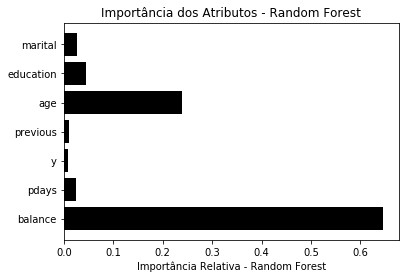

In [27]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title('Importância dos Atributos - Random Forest')
plt.barh(range(len(indices2)), importances2, color = 'black', align = 'center')
plt.yticks(range(len(indices2)),features)
plt.xlabel('Importância Relativa - Random Forest')
plt.show()

In [ ]:
### Baseado nos resultados acima, temos:
### Variável balance (saldo bancário) é, de longe, a variável mais importante na exigência ou não, de seguro de crédito.
### Portanto, o fator determinante para que o banco conceda um seguro de crédito é o saldo bancário.

### Fim